# This the way of case study method. But we should do the below steps according to the question:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder,PowerTransformer

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso

import statsmodels.api as sm

from sklearn.metrics import  r2_score, mean_squared_error

In [2]:
df=pd.read_csv('train_slr.csv')

In [3]:
df

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [5]:
df.shape

(512087, 11)

In [6]:
df.size

5632957

In [7]:
df.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

### Dropping the unwanted columns

In [8]:
df.drop(['ID','Day_No','Course_ID'],axis=1,inplace=True)

In [9]:
df.head()

,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,Development,Course,0,1,1,11004,0.007,81
1,Development,Course,0,0,1,13650,0.007,79
2,Development,Course,0,0,1,11655,0.007,75
3,Development,Course,0,0,1,12054,0.007,80
4,Development,Course,0,0,1,6804,0.007,41


In [10]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['Short_Promotion',
 'Public_Holiday',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric',
 'Sales']

In [11]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['Course_Domain', 'Course_Type']

### 5 point summary of categorical and numerical columns

In [12]:
df[num].describe()

,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [13]:
df[cat].describe()

,Course_Domain,Course_Type
count,512087,512087
unique,4,3
top,Development,Course
freq,264295,262747


### Missing value treatment

In [14]:
df.isna().any()

Course_Domain         False
Course_Type           False
Short_Promotion       False
Public_Holiday        False
Long_Promotion        False
User_Traffic          False
Competition_Metric     True
Sales                 False
dtype: bool

In [15]:
df.isna().sum()

Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [16]:
df['Competition_Metric'].skew()

2.577967382534611

<function matplotlib.pyplot.show(close=None, block=None)>

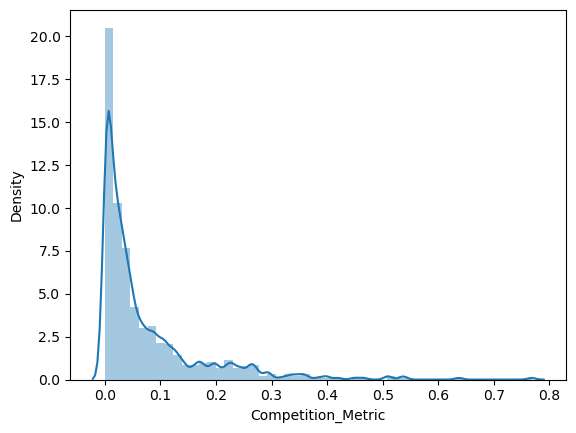

In [17]:
sns.distplot(df['Competition_Metric'])
plt.show

In [18]:
df['Competition_Metric']= df['Competition_Metric'].fillna(df['Competition_Metric'].median())

In [19]:
df['Competition_Metric'].isna().any()

False

## Plots

### Univariate

In [20]:
df[cat]

,Course_Domain,Course_Type
0,Development,Course
1,Development,Course
2,Development,Course
3,Development,Course
4,Development,Course
...,...,...
512082,Software Marketing,Program
512083,Software Marketing,Program
512084,Software Marketing,Program
512085,Software Marketing,Program


In [21]:
df['Course_Domain'].value_counts(normalize=True)

Development             0.516113
Software Marketing      0.324500
Finance & Accounting    0.150775
Business                0.008612
Name: Course_Domain, dtype: float64

In [22]:
df['Course_Type'].value_counts(normalize=True)

Course     0.513091
Program    0.483465
Degree     0.003445
Name: Course_Type, dtype: float64

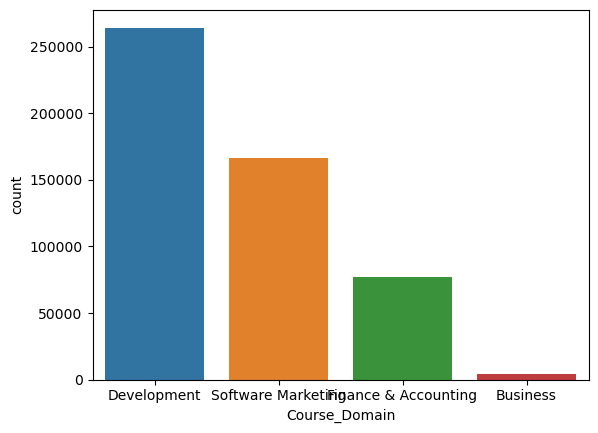

In [23]:
sns.countplot(data = df , x=df['Course_Domain'])
plt.show()

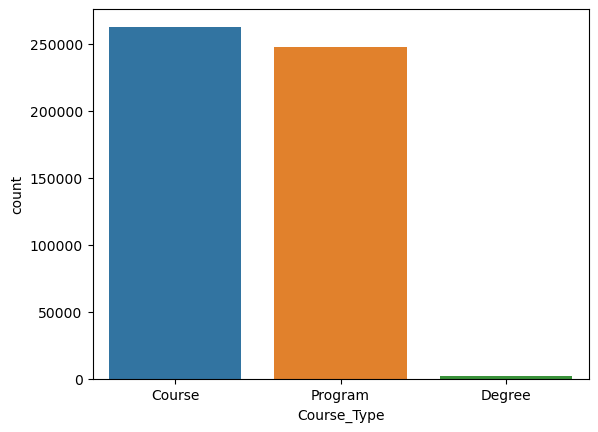

In [24]:
sns.countplot(data = df, x=df['Course_Type'])
plt.show()

In [25]:
df[num]

,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,0,1,1,11004,0.007,81
1,0,0,1,13650,0.007,79
2,0,0,1,11655,0.007,75
3,0,0,1,12054,0.007,80
4,0,0,1,6804,0.007,41
...,...,...,...,...,...,...
512082,0,0,1,8904,0.070,114
512083,0,0,1,10542,0.070,145
512084,0,0,1,13671,0.070,167
512085,0,0,1,8904,0.070,107


##### Since Short_Promotion , Public_Holiday , Long_Promotion are seems to be categorical i am using count plot for them

In [26]:
df['Short_Promotion'].value_counts(normalize=True)

0    0.619756
1    0.380244
Name: Short_Promotion, dtype: float64

In [27]:
df['Public_Holiday'].value_counts(normalize=True)

0    0.968361
1    0.031639
Name: Public_Holiday, dtype: float64

In [28]:
df['Long_Promotion'].value_counts(normalize=True)

0    0.511032
1    0.488968
Name: Long_Promotion, dtype: float64

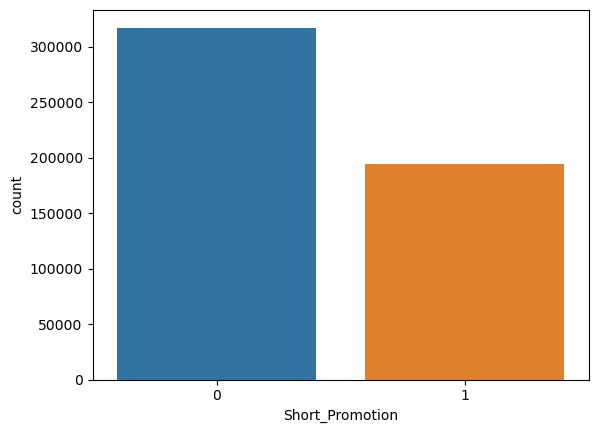

In [29]:
sns.countplot(data = df , x=df['Short_Promotion'])
plt.show()

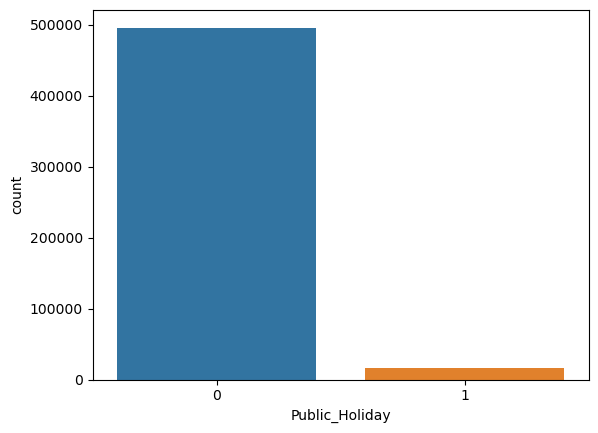

In [30]:
sns.countplot(data = df, x=df['Public_Holiday'])
plt.show()

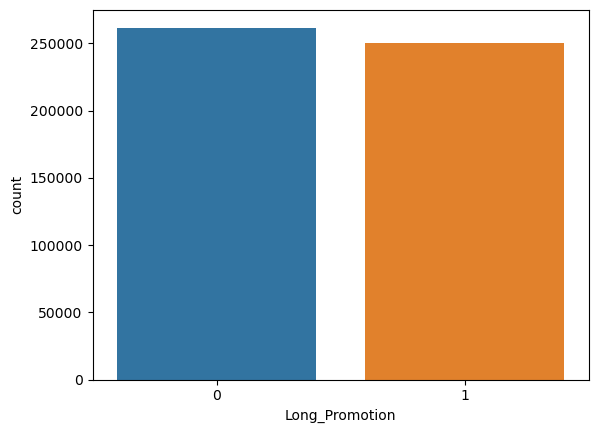

In [31]:
sns.countplot(data = df , x=df['Long_Promotion'])
plt.show()

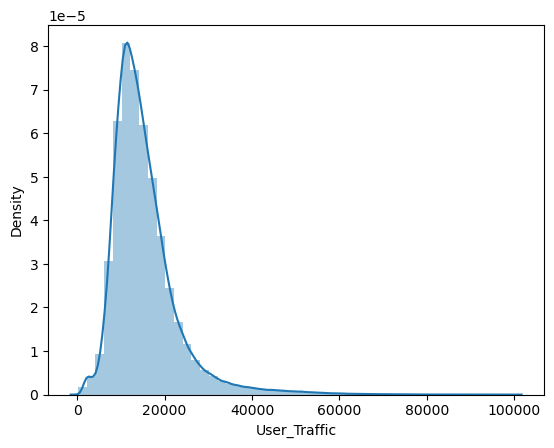

In [32]:
sns.distplot(df['User_Traffic'])
plt.show()

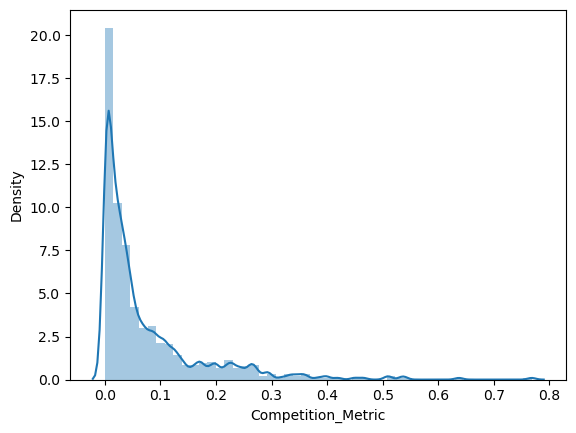

In [33]:
sns.distplot(df['Competition_Metric'])
plt.show()

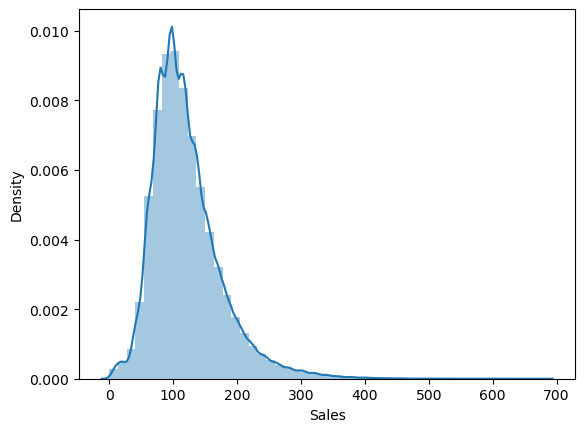

In [34]:
sns.distplot(df['Sales'])
plt.show()

### Bivariate

Num vs Cat

In [35]:
num

['Short_Promotion',
 'Public_Holiday',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric',
 'Sales']

In [36]:
cat

['Course_Domain', 'Course_Type']

In [37]:
plt.rcParams['figure.figsize']=[20,10]

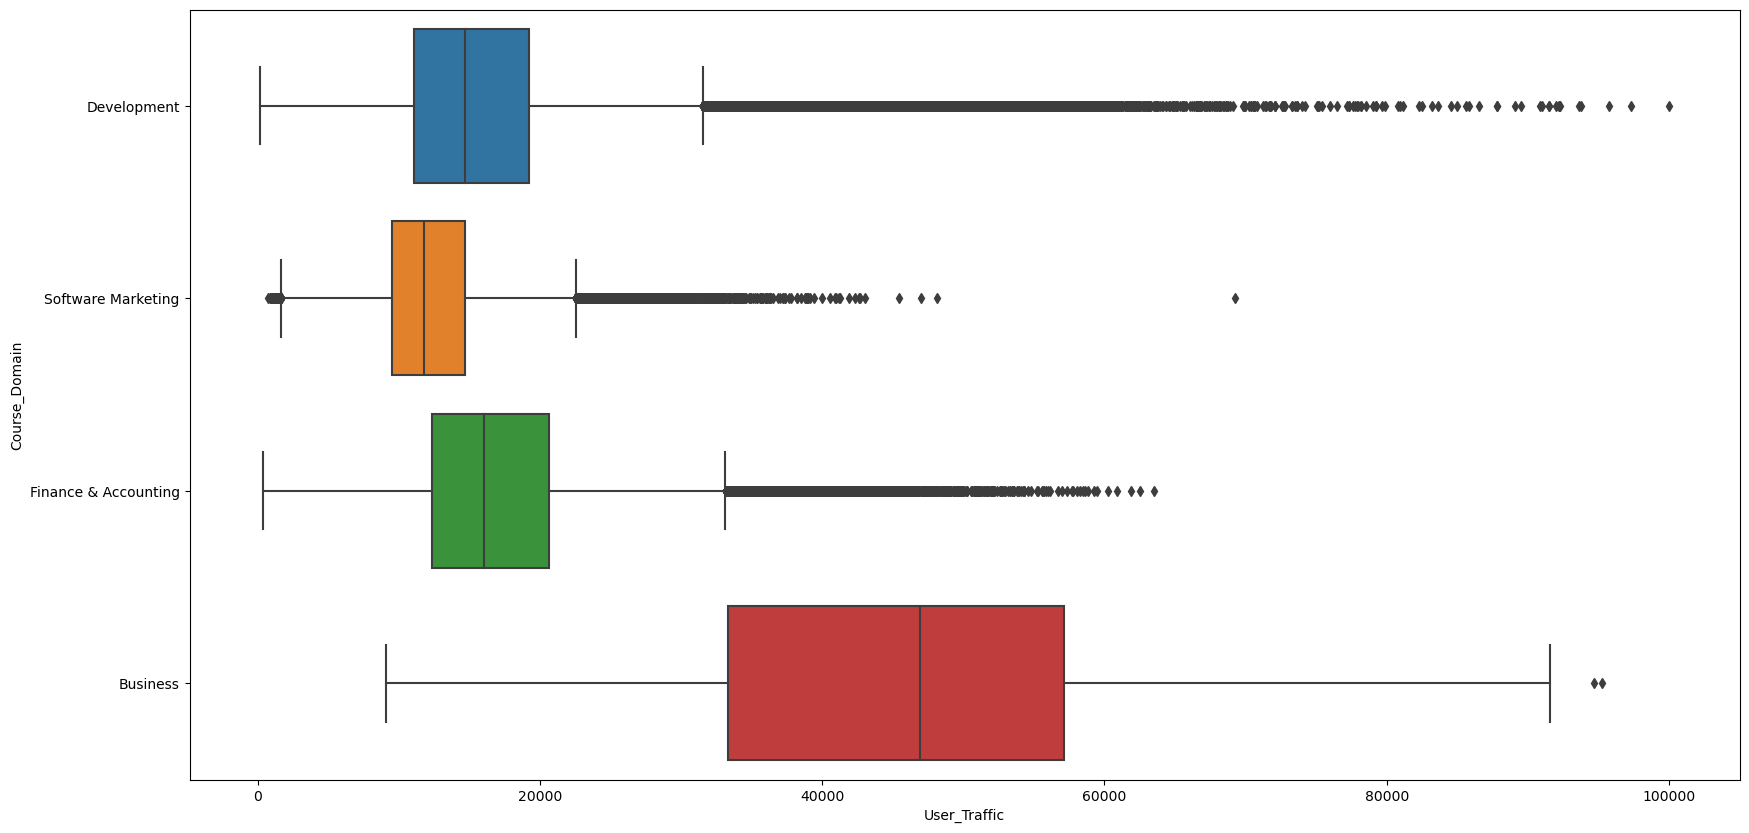

In [38]:
sns.boxplot(data = df, x=df['User_Traffic'],y=df['Course_Domain'])
plt.show()

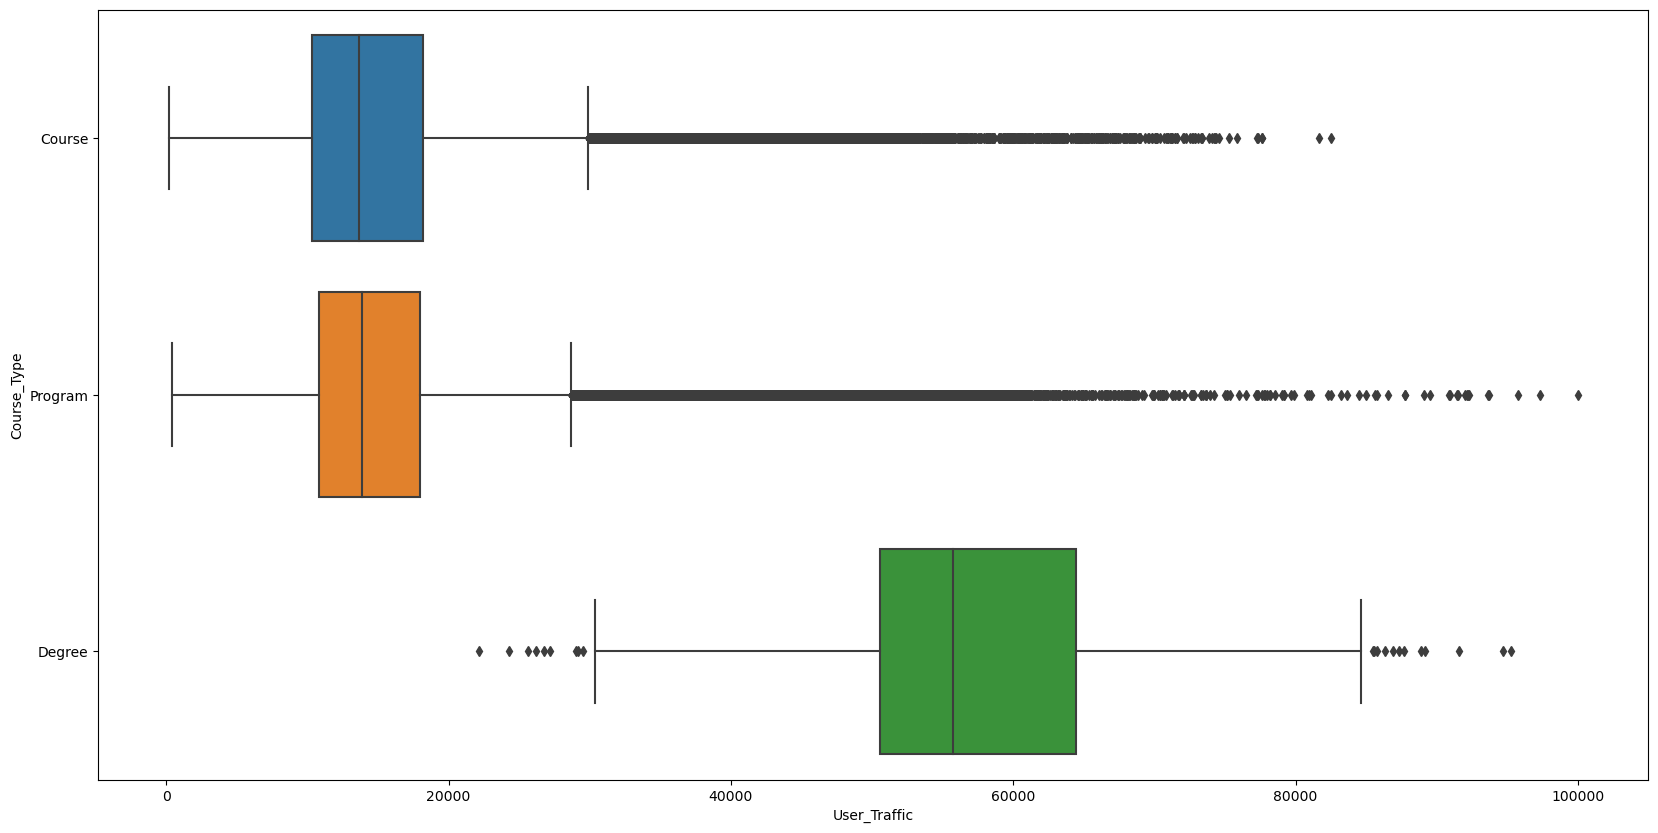

In [39]:
sns.boxplot(data = df, x= df['User_Traffic'],y=df['Course_Type'])
plt.show()

In [40]:
# Like this do for aLL 

Num vs Num

In [41]:
num

['Short_Promotion',
 'Public_Holiday',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric',
 'Sales']

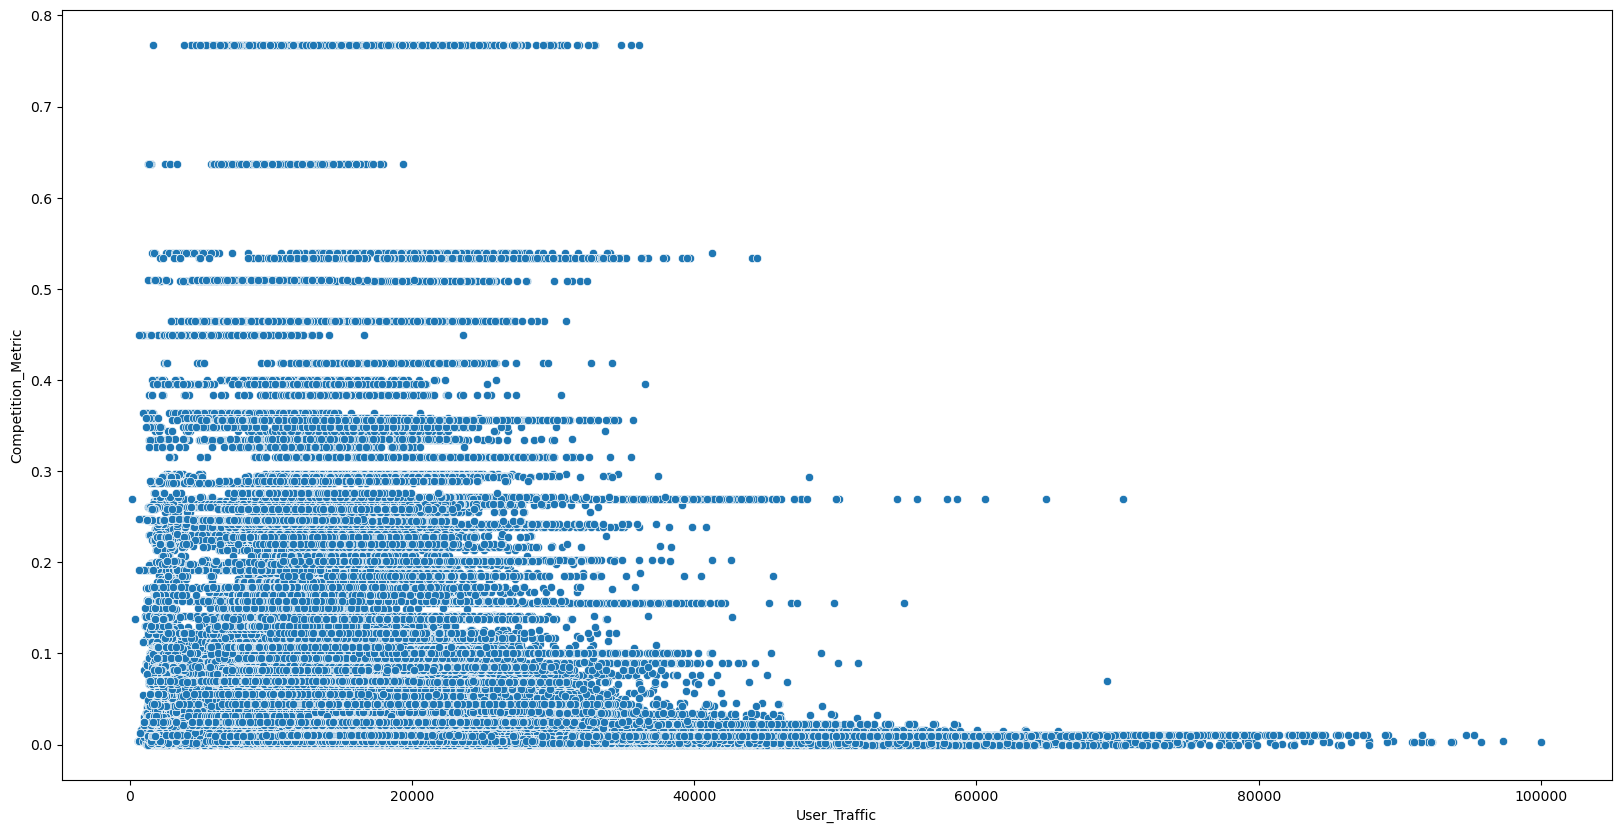

In [42]:
sns.scatterplot(x=df['User_Traffic'],y=df['Competition_Metric'])
plt.show()

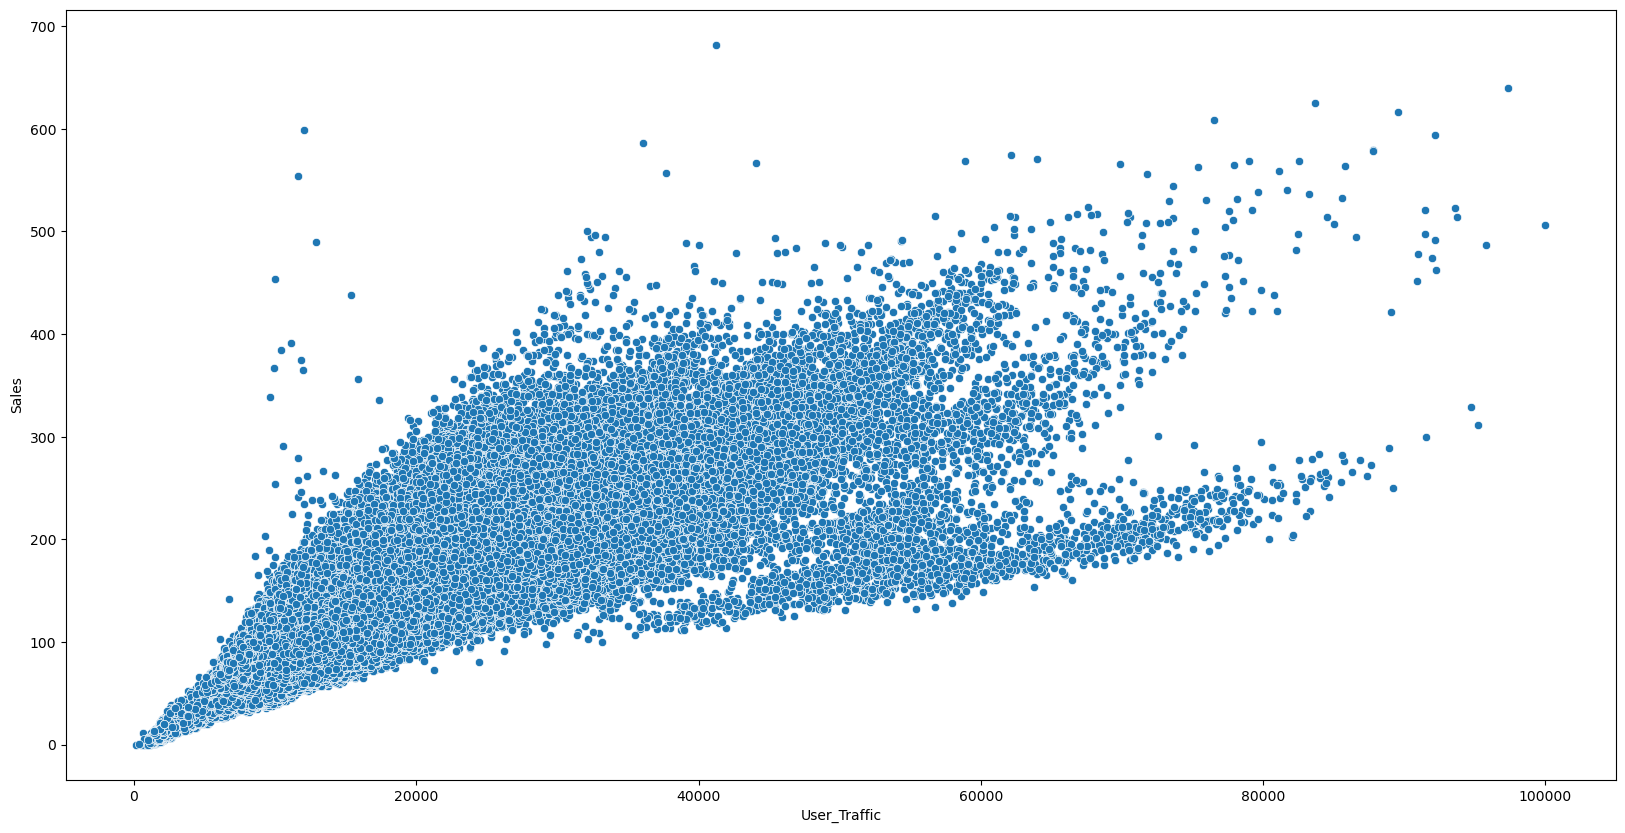

In [43]:
sns.scatterplot(x=df['User_Traffic'],y=df['Sales'])
plt.show()

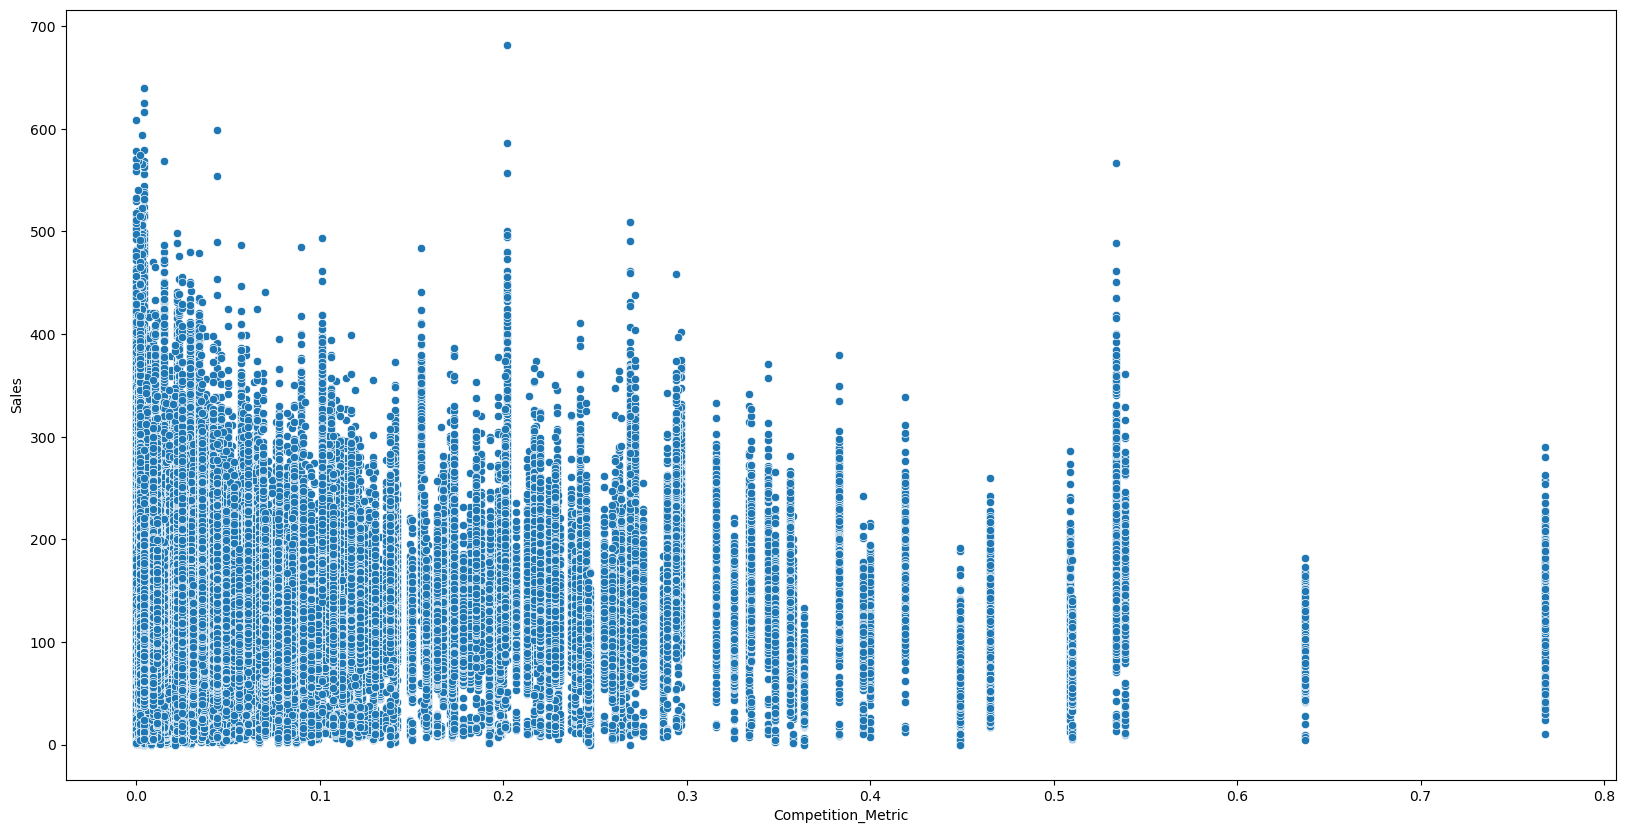

In [44]:
sns.scatterplot(x=df['Competition_Metric'],y=df['Sales'])
plt.show()

### Multivariate

In [45]:
c=df[['User_Traffic','Competition_Metric','Sales']].corr()
c

,User_Traffic,Competition_Metric,Sales
User_Traffic,1.000000,-0.148185,0.829741
Competition_Metric,-0.148185,1.000000,-0.021716
Sales,0.829741,-0.021716,1.000000


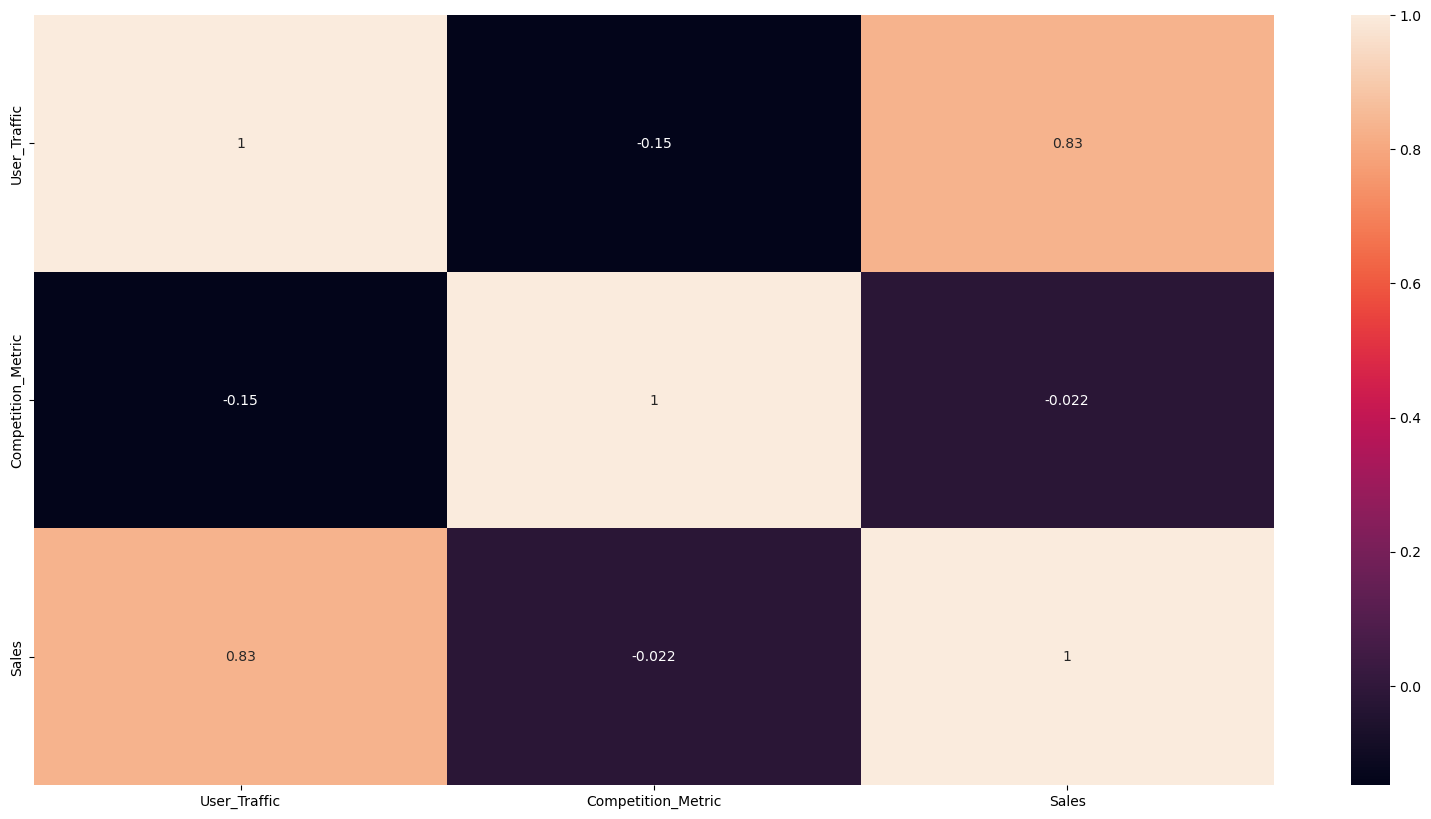

In [46]:
sns.heatmap(c,annot=True)
plt.show()

* Sales and User Traffic is highly correlated
* sales and Competiton metric are slightly negatively correlated
* Competition metric and user traffic are slighly negavtively correlated

### Transformation

Since sales is target column we wont transform it.

In [47]:
df.skew()

Short_Promotion       0.493386
Public_Holiday        5.351565
Long_Promotion        0.044140
User_Traffic          2.307822
Competition_Metric    2.584232
Sales                 1.374770
dtype: float64

In [48]:
df['User_Traffic'].skew()

2.3078221100271894

In [49]:
df[df['User_Traffic'] < 0]

,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales


In [50]:
p=PowerTransformer()

df['User_Traffic'] = p.fit_transform(df[['User_Traffic']])

In [51]:
df['User_Traffic'].skew()

0.029702475048394177

In [52]:
df['Competition_Metric'].skew()

2.5842323728748635

In [53]:
df[df['Competition_Metric'] < 0]

,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales


In [54]:
pp=PowerTransformer()

df['Competition_Metric'] = pp.fit_transform(df[['Competition_Metric']])  
# even if we have no negative values box cox showing error 
# so i am following Yeo Johnson

In [55]:
pp=PowerTransformer()

df['Competition_Metric'] = pp.fit_transform(df[['Competition_Metric']])

In [56]:
df['Competition_Metric'].skew()

0.11870706471976265

### Check for outliers

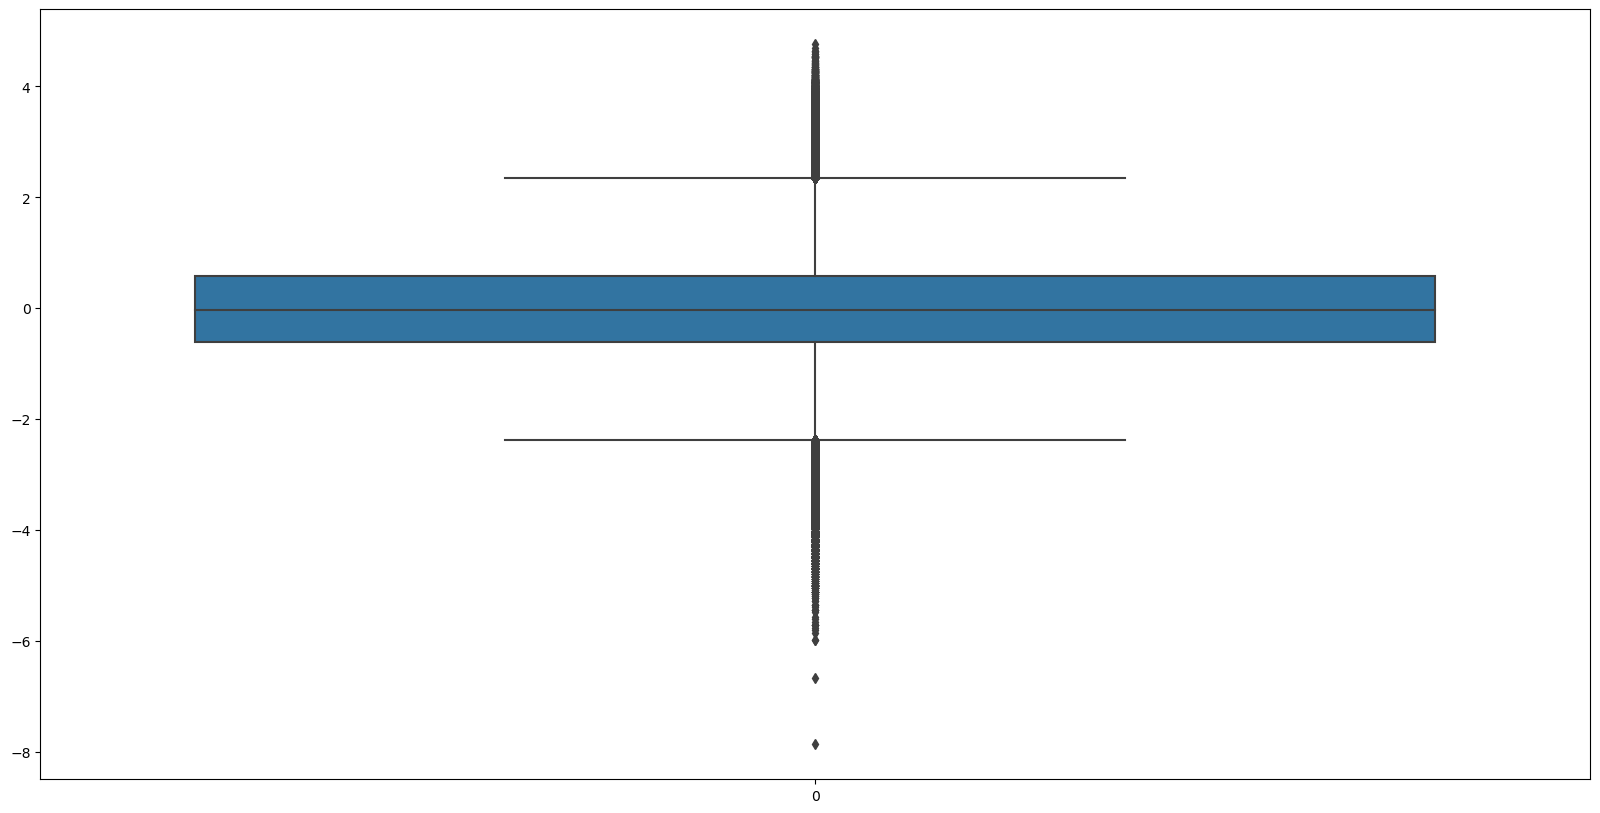

In [57]:
sns.boxplot(df['User_Traffic'])
plt.show()

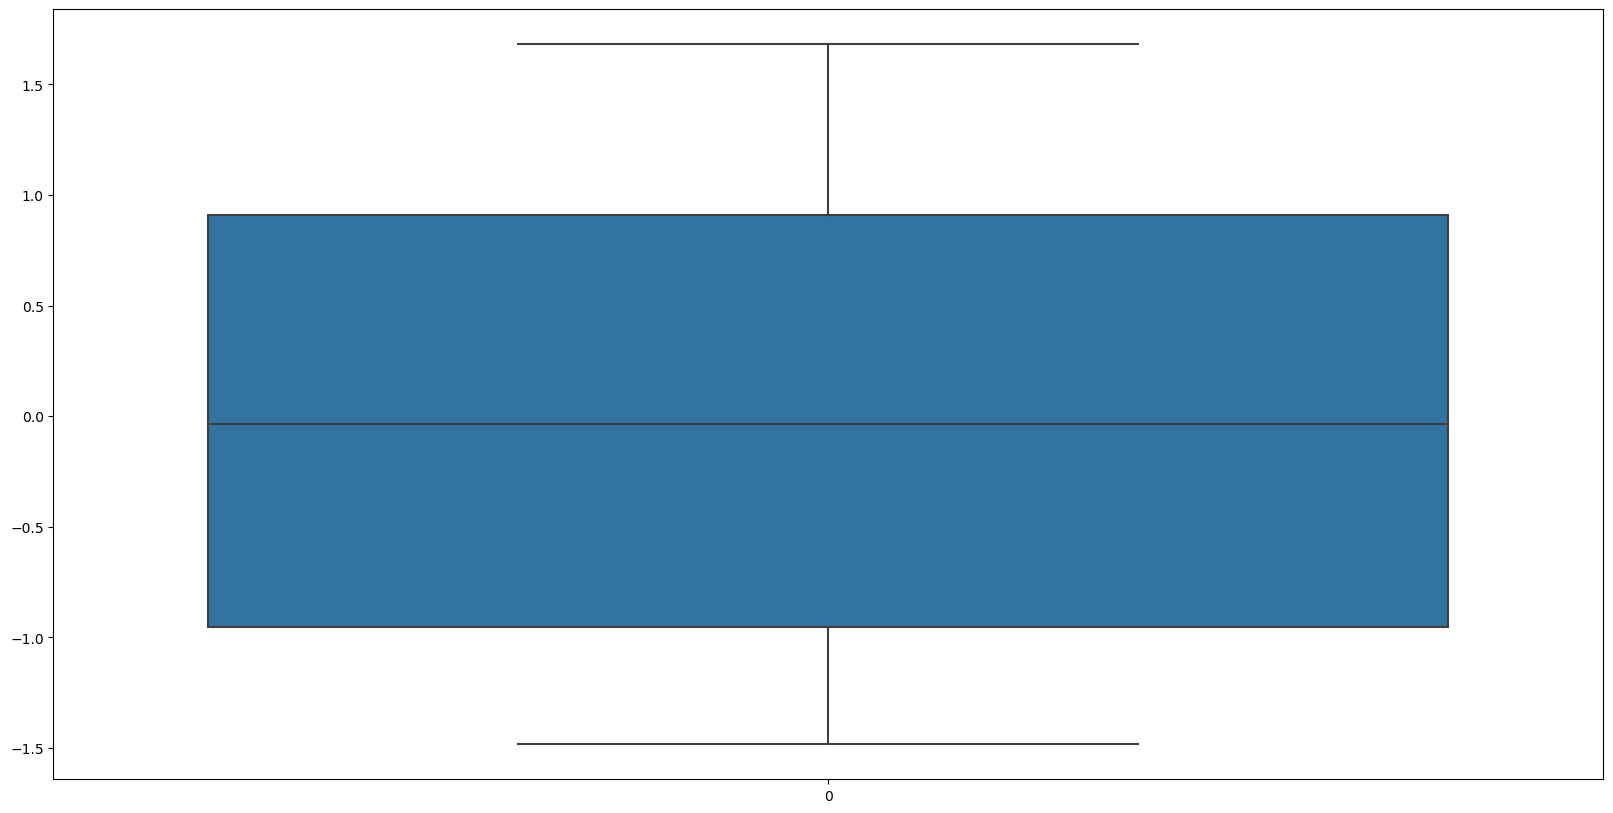

In [58]:
sns.boxplot(df['Competition_Metric'])
plt.show()

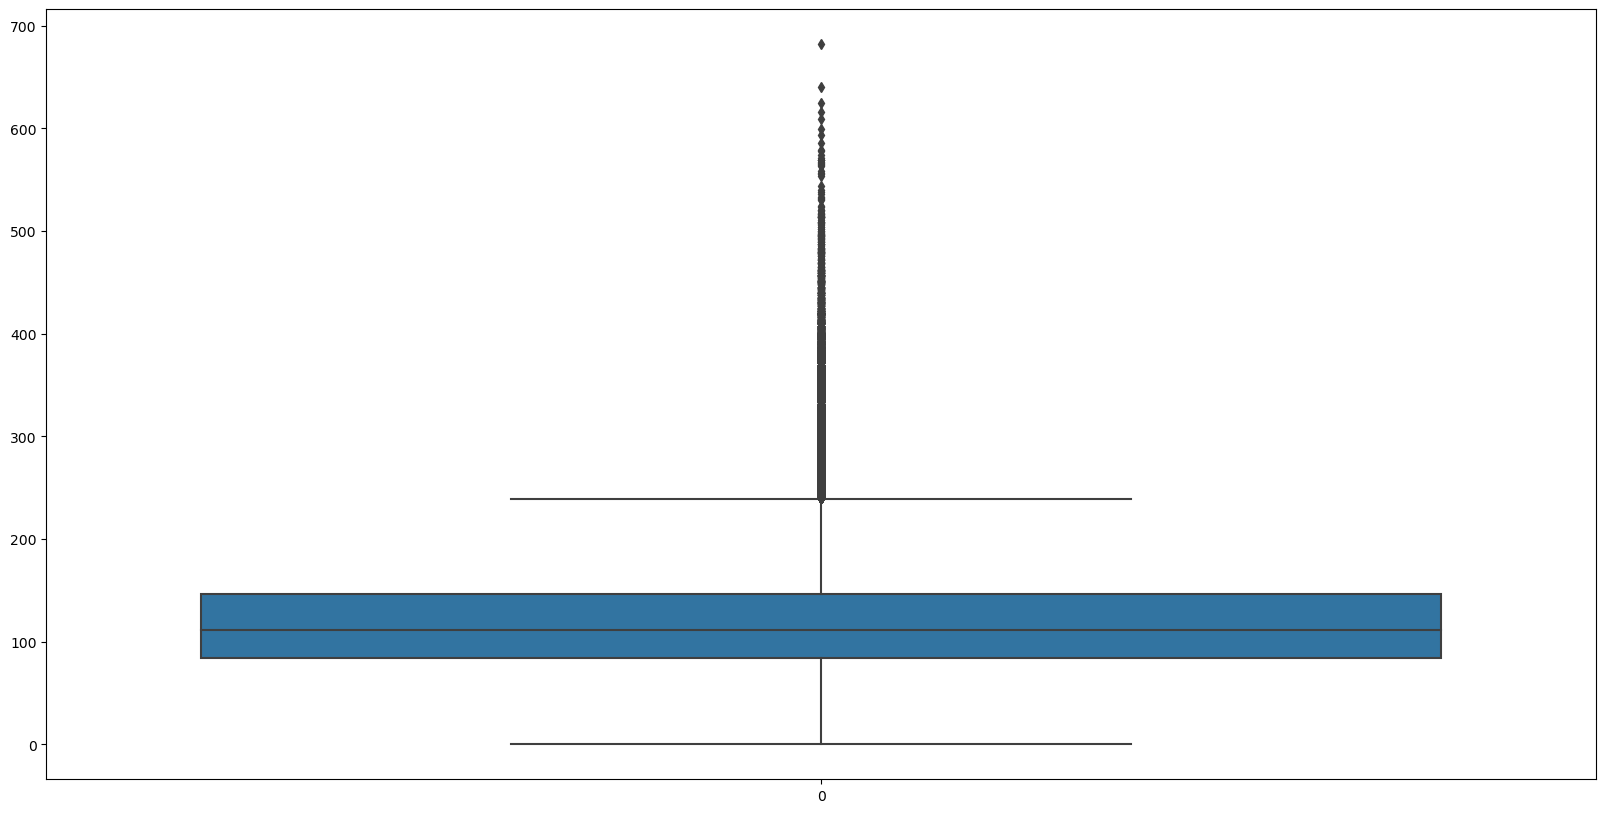

In [59]:
sns.boxplot(df['Sales'])
plt.show()

In [60]:
nn=['User_Traffic','Sales']

In [61]:
q1=df[nn].quantile(0.25)
q1

User_Traffic    -0.604935
Sales           84.000000
Name: 0.25, dtype: float64

In [62]:
q3=df[nn].quantile(0.75)
q3

User_Traffic      0.574135
Sales           146.000000
Name: 0.75, dtype: float64

In [63]:
iqr=q3-q1
iqr

User_Traffic     1.17907
Sales           62.00000
dtype: float64

In [64]:
uw= q3+ (1.5*iqr)
uw

User_Traffic      2.34274
Sales           239.00000
dtype: float64

In [65]:
lw= q1 - (1.5*iqr)
lw

User_Traffic   -2.373539
Sales          -9.000000
dtype: float64

Just i have shown the dataset withour outliers. But i am not removing the outliers

### Encoding

In [66]:
df[cat]

,Course_Domain,Course_Type
0,Development,Course
1,Development,Course
2,Development,Course
3,Development,Course
4,Development,Course
...,...,...
512082,Software Marketing,Program
512083,Software Marketing,Program
512084,Software Marketing,Program
512085,Software Marketing,Program


In [67]:
cat

['Course_Domain', 'Course_Type']

In [68]:
df2=pd.get_dummies(data=df,columns=cat,drop_first=True)
df2

,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,0,1,1,-0.521700,-1.101394,81,1,0,0,0,0
1,0,0,1,-0.055007,-1.101394,79,1,0,0,0,0
2,0,0,1,-0.398182,-1.101394,75,1,0,0,0,0
3,0,0,1,-0.325518,-1.101394,80,1,0,0,0,0
4,0,0,1,-1.527939,-1.101394,41,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512082,0,0,1,-0.970795,0.642857,114,0,0,1,0,1
512083,0,0,1,-0.613421,0.642857,145,0,0,1,0,1
512084,0,0,1,-0.051642,0.642857,167,0,0,1,0,1
512085,0,0,1,-0.970795,0.642857,107,0,0,1,0,1


I am following this way of scaling after train,test split

### Train test split:

In [69]:
x=df2.drop('Sales',axis=1)

In [70]:
y=df2['Sales']

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [72]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(358460, 10)
(358460,)
(153627, 10)
(153627,)


### Scaling

In [73]:
xtrain_sc=xtrain.copy()
xtest_sc=xtest.copy()

### Add Constant

In [74]:
xtrain_sc1= sm.add_constant(xtrain_sc)
xtest_sc1= sm.add_constant(xtest_sc)

### Base Model

In [75]:
model1= sm.OLS(ytrain,xtrain_sc1).fit()

In [76]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 1.307e+05
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:23:25   Log-Likelihood:            -1.6653e+06
No. Observations:              358460   AIC:                         3.331e+06
Df Residuals:                  358449   BIC:                         3.331e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 83.1956      0.594    140.163      0.000      82.032      84.359
Short_Promotion                       16.9734      0.090    188.449      0.000      16.797      17.150
Public_Holiday                        12.5647      0.246     51.056      0.000      12.082      13.047
Long_Promotion                         7.4392      0.088     84.353      0.000       7.266       7.612
User_Traffic                          49.2275      0.050    984.832      0.000      49.130      49.325
Competition_Metric                     5.9265      0.046    128.989      0.000       5.836       6.017
Course_Domain_Development             20.3430      0.595     34.165      0.000      19.176      21.510
Course_Domain_Finance & Accounting    14.9918      0.601     24.926      0.000      13.813      16.171
Course_Domain_Software Marketing      36.9346      0.604     61.172      0.000      35.751      38.118
Course_Type_Degree                   -65.6934      0.926    -70.981      0.000     -67.507     -63.879
Course_Type_Program                    5.3913      0.088     61.387      0.000       5.219       5.563
==============================================================================
Omnibus:                   118738.351   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           725480.123
Skew:                           1.461   Prob(JB):                         0.00
Kurtosis:                       9.327   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R- square of this base model is 0.784
* The p val of all the column are zero


## Check for Multicollinearity(VIF)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [78]:
col=xtrain_sc1.columns.to_list()
col

['const',
 'Short_Promotion',
 'Public_Holiday',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric',
 'Course_Domain_Development',
 'Course_Domain_Finance & Accounting',
 'Course_Domain_Software Marketing',
 'Course_Type_Degree',
 'Course_Type_Program']

In [79]:
xtrain_sc1.shape[1]

11

In [80]:
vif = [VIF(xtrain_sc1.values,i)  for i in range(xtrain_sc1.shape[1])]

In [81]:
vif_df = pd.DataFrame(vif, index = col,columns = ['VIF'])

In [82]:
vif_df.sort_values(by='VIF',ascending=False)

,VIF
const,198.933037
Course_Domain_Development,50.001316
Course_Domain_Software Marketing,45.139462
Course_Domain_Finance & Accounting,26.217059
Course_Type_Degree,1.668610
User_Traffic,1.411640
Competition_Metric,1.191533
Long_Promotion,1.097366
Course_Type_Program,1.087422
Short_Promotion,1.079560


Droping the column Course_Domain_Development since it has high VIF value from xtrain_sc1

In [83]:
xtrain_sc2=xtrain_sc1.drop('Course_Domain_Development',axis=1)

In [84]:
xtest_sc2=xtest_sc1.drop('Course_Domain_Development',axis=1)

In [85]:
print(xtrain_sc2.shape)
print(xtest_sc2.shape)

(358460, 10)
(153627, 10)


### Buliding model again and check for VIF

In [86]:
model2 = sm.OLS(ytrain,xtrain_sc2).fit()

In [87]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 1.447e+05
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:23:28   Log-Likelihood:            -1.6658e+06
No. Observations:              358460   AIC:                         3.332e+06
Df Residuals:                  358450   BIC:                         3.332e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                103.2667      0.085   1216.796      0.000     103.100     103.433
Short_Promotion                       17.1039      0.090    189.760      0.000      16.927      17.281
Public_Holiday                        12.2944      0.246     49.903      0.000      11.812      12.777
Long_Promotion                         7.3888      0.088     83.657      0.000       7.216       7.562
User_Traffic                          48.9617      0.049    989.992      0.000      48.865      49.059
Competition_Metric                     5.9427      0.046    129.139      0.000       5.853       6.033
Course_Domain_Finance & Accounting    -5.1189      0.124    -41.402      0.000      -5.361      -4.877
Course_Domain_Software Marketing      16.6074      0.103    161.437      0.000      16.406      16.809
Course_Type_Degree                   -84.8922      0.737   -115.254      0.000     -86.336     -83.448
Course_Type_Program                    5.6099      0.088     63.942      0.000       5.438       5.782
==============================================================================
Omnibus:                   118373.632   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           723308.725
Skew:                           1.456   Prob(JB):                         0.00
Kurtosis:                       9.320   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
col1=xtrain_sc2.columns.to_list()
col1

['const',
 'Short_Promotion',
 'Public_Holiday',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric',
 'Course_Domain_Finance & Accounting',
 'Course_Domain_Software Marketing',
 'Course_Type_Degree',
 'Course_Type_Program']

In [89]:
vif1 = [VIF(xtrain_sc2.values,i)  for i in range(xtrain_sc2.shape[1])]

In [90]:
vif_df = pd.DataFrame(vif1, index = col1,columns = ['VIF'])

In [91]:
vif_df

,VIF
const,4.053650
Short_Promotion,1.077618
Public_Holiday,1.047923
Long_Promotion,1.097058
User_Traffic,1.377436
Competition_Metric,1.191406
Course_Domain_Finance & Accounting,1.104284
Course_Domain_Software Marketing,1.306133
Course_Type_Degree,1.053447
Course_Type_Program,1.081649


Since All the values of VIF of all the columns are less than 5(threshold) we can stop here

#### Find ypred , r2, rmse 

In [92]:
ypred = model2.predict(xtest_sc2)
ypred

311266    172.336207
362025    103.489796
53255     123.491014
293670     80.145795
3424      143.070820
             ...    
366964    175.521182
258559    -18.652947
272385    192.165733
496992    167.566269
257398    102.820071
Length: 153627, dtype: float64

In [93]:
print(r2_score(ytest,ypred))

0.7839438930279402


In [94]:
print(mean_squared_error(ytest,ypred))

640.5072621131991


In [95]:
print(np.sqrt(mean_squared_error(ytest,ypred)))

25.30824494336182


# Do Ridge or Laaso


### Using Ridge to improve the model prediction

In [96]:
ridge = Ridge().fit(xtrain_sc2,ytrain)

In [97]:
ypred2= ridge.predict(xtest_sc2)
ypred2

array([172.33500444, 103.49109126, 123.49095271, ..., 192.16365479,
       167.5648916 , 102.82104909])

In [98]:
print(r2_score(ytest,ypred2))

0.7839439105954262


In [99]:
print(mean_squared_error(ytest,ypred2))

640.5072100336606


In [100]:
print(np.sqrt(mean_squared_error(ytest,ypred2)))

25.308243914457215


### Hyper Parameter Tuning

In [101]:
params = { 'alpha' : [0.01,0.02,0.001,0.04,0.005]}

In [102]:
grids = GridSearchCV( estimator = ridge , param_grid=params, cv= 5 , scoring = 'r2')

In [103]:
grids.fit(xtrain_sc2, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.001, 0.04, 0.005]},
             scoring='r2')

In [104]:
grids.best_params_

{'alpha': 0.04}

### Again Build Ridge model using alpha = 0.04

In [105]:
ridge_final = Ridge(alpha=0.04).fit(xtrain_sc2,ytrain)

In [106]:
ypred3 = ridge_final.predict(xtest_sc2)
ypred3

array([172.33615922, 103.48984744, 123.491012  , ..., 192.16564942,
       167.566214  , 102.82011062])

In [107]:
print(r2_score(ytest,ypred3))

0.7839438939554257


In [108]:
print(mean_squared_error(ytest,ypred3))

640.50725936363


In [109]:
print(np.sqrt(mean_squared_error(ytest,ypred3)))

25.308244889040214
